In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 18.1 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Unable to revert mtime: /Library/Fonts
Matplotlib is building the font cache; this may take a moment.


# Limpieza

Eliminar filas duplicadas (8683)

- **hotel**: No necesita limpieza
- **is_canceled**: No necesita limpieza
- **lead_time**: Reemplazar valores arriba del promedio por el promedio
- **arrival_date_year**: No necesita limpieza
- **arrival_date_month**: No necesita limpieza
- **arrival_date_week_number**: No necesita limpieza
- **arrival_date_day_of_month**: No necesita limpieza
- **stays_in_weekend_nights**: No necesita limpieza
- **stays_in_week_nights**: No necesita limpieza
- **adults**: Eliminar filas que tienen 0
- **children**: Eliminar nulos 4
- **babies**: Eliminar más de 2
- **meal**: Eliminar Undefined
- **country**: Borrar filas con nulos 133
- **market_segment**: Eliminar Undefined son 2 registros
- **distribution_channel**: Eliminar Undefined
- **is_repeated_guest**: No necesita limpieza
- **previous_cancellations**: No necesita limpieza
- **previous_bookings_not_canceled**: No necesita limpieza
- **reserved_room_type**: No necesita limpieza
- **assigned_room_type**: No necesita limpieza
- **booking_changes**: No necesita limpieza
- **deposit_type**: No necesita limpieza
- **agent**: Eliminar con nulos tiene 3099 
- **company**: Eliminar fila
- **required_car_parking_spaces**: No necesita limpieza
- **total_of_special_requests**: No necesita limpieza
- **reservation_status**: No necesita limpieza
- **reservation_status_date**: No necesita limpieza

In [3]:
df = pd.read_excel("../datasets/hotel_revenue_historical_full.xlsx")
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21996 entries, 0 to 21995
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           21996 non-null  object        
 1   is_canceled                     21996 non-null  int64         
 2   lead_time                       21996 non-null  int64         
 3   arrival_date_year               21996 non-null  int64         
 4   arrival_date_month              21996 non-null  object        
 5   arrival_date_week_number        21996 non-null  int64         
 6   arrival_date_day_of_month       21996 non-null  int64         
 7   stays_in_weekend_nights         21996 non-null  int64         
 8   stays_in_week_nights            21996 non-null  int64         
 9   adults                          21996 non-null  int64         
 10  children                        21992 non-null  float64       
 11  ba

In [13]:
print(f"Size of the dataset: {len(df)}")

Size of the dataset: 21996


In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,21996.000000,21996.000000,21996.0,21996.000000,21996.000000,21996.000000,21996.000000,21996.000000,21992.000000,21996.000000,...,21996.000000,21996.000000,21996.000000,18897.000000,1305.000000,21996.000000,21996.000000,21996.000000,21996.000000,21996
mean,0.370158,97.245999,2018.0,39.618976,15.630342,0.929714,2.461266,1.830424,0.061704,0.010138,...,0.336425,0.031915,0.177669,78.455416,151.665900,2.279778,87.178515,0.061466,0.435443,2018-08-25 17:45:08.346972160
min,0.000000,0.000000,2018.0,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,14.000000,2018.0,34.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,40.000000,0.000000,62.000000,0.000000,0.000000,2018-07-26 00:00:00
50%,0.000000,56.000000,2018.0,39.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,122.000000,0.000000,77.760000,0.000000,0.000000,2018-09-16 00:00:00
75%,1.000000,146.000000,2018.0,44.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,175.000000,223.000000,0.000000,108.000000,0.000000,1.000000,2018-10-28 00:00:00
max,1.000000,737.000000,2018.0,53.000000,31.000000,18.000000,42.000000,55.000000,10.000000,9.000000,...,26.000000,14.000000,20.000000,352.000000,356.000000,122.000000,508.000000,2.000000,5.000000,2019-01-14 00:00:00
std,0.482858,105.104227,0.0,6.810472,8.712245,1.005584,1.892400,0.851232,0.319672,0.116152,...,1.823073,0.374912,0.545776,102.368913,108.821667,13.078451,42.748795,0.240944,0.743031,NaN


In [15]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             133
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3099
company                           20691


In [16]:

df.duplicated().sum()

np.int64(8683)

In [17]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

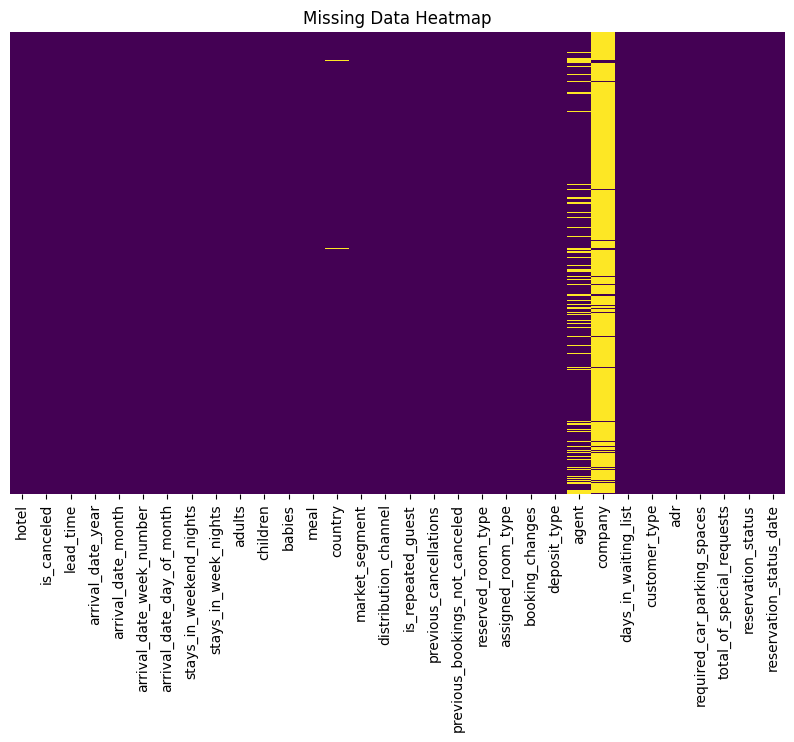

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

Eliminar columna company, llenar columna agent con valor nulo, eliminar registros sin pais. 

In [4]:
df['hotel'].value_counts()

hotel
City Hotel      13682
Resort Hotel     8314
Name: count, dtype: int64

In [19]:
df['is_canceled'].value_counts(normalize=True) * 100

is_canceled
0    62.984179
1    37.015821
Name: proportion, dtype: float64

In [8]:
df['lead_time'].value_counts()

lead_time
0      1485
1       684
2       377
3       365
5       354
       ... 
737       1
228       1
298       1
255       1
532       1
Name: count, Length: 364, dtype: int64

In [9]:
df['arrival_date_year'].value_counts()

arrival_date_year
2018    21996
Name: count, dtype: int64

In [10]:
df['arrival_date_week_number'].value_counts()

arrival_date_week_number
41    1401
38    1371
39    1304
42    1222
33    1168
37    1132
36    1031
40    1028
43     932
44     866
32     852
49     845
35     773
30     770
34     770
53     739
29     693
47     684
48     614
50     607
31     579
45     545
52     490
28     485
46     421
27     359
51     315
Name: count, dtype: int64

In [11]:
df['arrival_date_day_of_month'].value_counts()

arrival_date_day_of_month
5     1178
28    1102
17     930
18     925
25     868
16     844
9      810
30     805
8      788
10     778
3      758
24     752
23     736
15     725
4      708
12     703
20     698
19     688
14     664
11     656
7      648
27     647
6      645
21     636
26     632
2      610
1      567
22     565
31     498
13     432
Name: count, dtype: int64

In [12]:
df['stays_in_weekend_nights'].value_counts()

stays_in_weekend_nights
0     9773
2     6363
1     5206
4      348
3      249
5       20
6       13
7       10
8        8
9        4
13       1
18       1
Name: count, dtype: int64

In [13]:
df['adults'].value_counts()

adults
2     16999
1      4475
3       454
0        44
4         8
26        5
5         2
27        2
20        2
40        1
55        1
50        1
6         1
10        1
Name: count, dtype: int64

In [14]:
df['children'].value_counts()

children
0.0     21081
1.0       478
2.0       427
3.0         5
10.0        1
Name: count, dtype: int64

In [15]:
df['babies'].value_counts()

babies
0    21783
1      210
2        2
9        1
Name: count, dtype: int64

In [16]:
df['meal'].value_counts()

meal
BB           17235
HB            3810
SC             412
FB             369
Undefined      170
Name: count, dtype: int64

In [17]:
df['country'].value_counts()

country
PRT    13307
ESP     1932
GBR     1356
FRA     1348
ITA      547
       ...  
LIE        1
PAN        1
GEO        1
TMP        1
ECU        1
Name: count, Length: 98, dtype: int64

In [22]:
df['market_segment'].value_counts()

market_segment
Online TA        6165
Groups           6100
Offline TA/TO    6079
Direct           2314
Corporate        1171
Complementary     165
Undefined           2
Name: count, dtype: int64

In [18]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        17741
Direct        2785
Corporate     1464
Undefined        5
GDS              1
Name: count, dtype: int64

In [19]:
df['is_repeated_guest'].value_counts()

is_repeated_guest
0    21355
1      641
Name: count, dtype: int64

In [20]:
df['previous_cancellations'].value_counts()

previous_cancellations
0     17561
1      4261
24       48
2        31
26       26
25       25
19       19
14       14
3         8
11        2
21        1
Name: count, dtype: int64

In [21]:
df['previous_bookings_not_canceled'].value_counts()

previous_bookings_not_canceled
0     21684
1       175
2        60
3        28
5        11
4        11
6         7
7         6
8         4
9         3
10        2
11        2
12        1
13        1
14        1
Name: count, dtype: int64

In [22]:
df['booking_changes'].value_counts()

booking_changes
0     19028
1      2331
2       462
3       113
4        37
5        18
7         2
8         1
17        1
6         1
20        1
11        1
Name: count, dtype: int64

In [23]:
df['agent'].value_counts()

agent
1.0      4204
240.0    2609
9.0      2317
6.0      1208
250.0     469
         ... 
90.0        1
117.0       1
103.0       1
158.0       1
118.0       1
Name: count, Length: 161, dtype: int64

In [24]:
df['company'].value_counts()

company
40.0     238
223.0    197
281.0    128
45.0      61
38.0      48
        ... 
100.0      1
142.0      1
130.0      1
140.0      1
160.0      1
Name: count, Length: 111, dtype: int64

In [25]:
df['days_in_waiting_list'].value_counts()

days_in_waiting_list
0      21247
58       164
87        80
122       54
77        38
69        36
65        34
50        30
33        29
91        25
57        24
47        23
21        22
27        21
60        20
79        20
111       20
98        15
99        15
49        13
17        10
6         10
40         9
48         8
38         8
59         8
80         7
53         5
89         1
Name: count, dtype: int64

In [26]:
df['adr'].value_counts()

adr
62.00     2418
0.00       586
90.00      578
65.00      577
60.00      546
          ... 
136.33       1
108.30       1
132.80       1
144.20       1
170.90       1
Name: count, Length: 2608, dtype: int64

In [27]:
df['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    20648
1     1344
2        4
Name: count, dtype: int64

In [28]:
df['total_of_special_requests'].value_counts()

total_of_special_requests
0    15313
1     4227
2     2047
3      383
4       22
5        4
Name: count, dtype: int64

In [29]:
df['reservation_status'].value_counts()

reservation_status
Check-Out    13854
Canceled      7951
No-Show        191
Name: count, dtype: int64

In [30]:
df['reservation_status_date'].value_counts()

reservation_status_date
2018-07-06    805
2018-01-01    763
2018-07-02    469
2018-09-09    290
2018-12-08    248
             ... 
2018-04-21      1
2018-04-25      1
2018-04-27      1
2019-01-11      1
2019-01-14      1
Name: count, Length: 315, dtype: int64

In [ ]:
df['customer_type'].value_counts()

customer_type
Transient          11431
Transient-Party     7715
Contract            2658
Group                192
Name: count, dtype: int64

In [21]:
df.groupby('customer_type')['is_canceled'].value_counts(normalize=True) * 100

customer_type    is_canceled
Contract         0              60.082769
                 1              39.917231
Group            0              82.291667
                 1              17.708333
Transient        0              63.529000
                 1              36.471000
Transient-Party  0              62.696047
                 1              37.303953
Name: proportion, dtype: float64

Eliminar Undefined

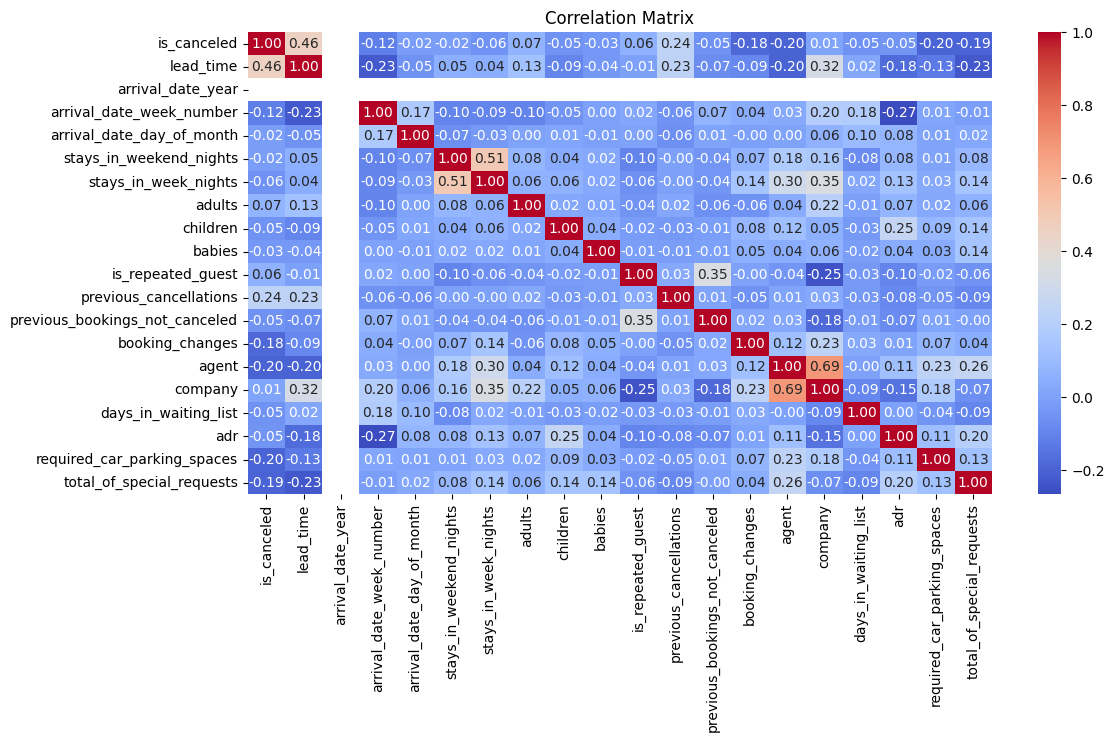

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()